In [1]:
import os
import geopandas as gpd

from pyincore import IncoreClient, FragilityCurveSet, FragilityService
from pyincore.dataservice import DataService
from pyincore.hazardservice import HazardService
from pyincore import Dataset
from pyincore import NetworkDataset
from pyincore_viz.geoutil import GeoUtil as viz
from pyincore_viz.plotutil import PlotUtil as plot

In [2]:
# Connect to IN-CORE Services
client = IncoreClient()

Connection successful to IN-CORE services. pyIncore version detected: 1.5.0


In [3]:
# testing datasets 

tornado_hazard_id = "5d07cbeab9219c065b080930"

joplin_bldg_inv_id = "5dbc8478b9219c06dd242c0d"

eq_hazard_id = "5b902cb273c3371e1236b36b"

shelby_hospital_inv_id = "5a284f0bc7d30d13bc081a28"

shelby_road_id = "5a284f2bc7d30d13bc081eb6"

centerville_epn_network_id = "5f454c6fef0df52132b65b0b"

galvaston_wave_height_id = '5f15cd62c98cf43417c10a3f'

memphis_water_buried_pipeline = "5a284f28c7d30d13bc081d14"

shelby_census_tract = "5a284f4cc7d30d13bc0822d4"

galveston_deterministic_hurricane = "5f15cd62c98cf43417c10a3f"

In [4]:
eq_metadata  = HazardService(client).get_earthquake_hazard_metadata(eq_hazard_id)
eq_dataset_id = eq_metadata['rasterDataset']['datasetId']

eq_dataset = Dataset.from_data_service(eq_dataset_id, DataService(client))

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


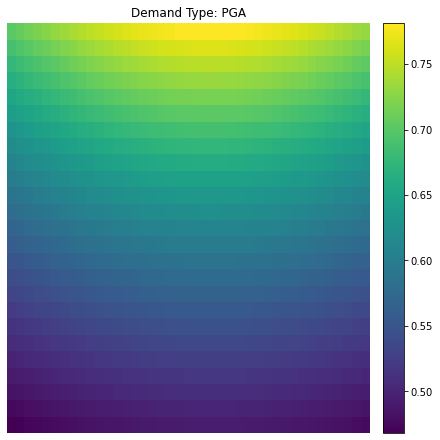

In [5]:
viz.plot_earthquake(eq_hazard_id, client)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


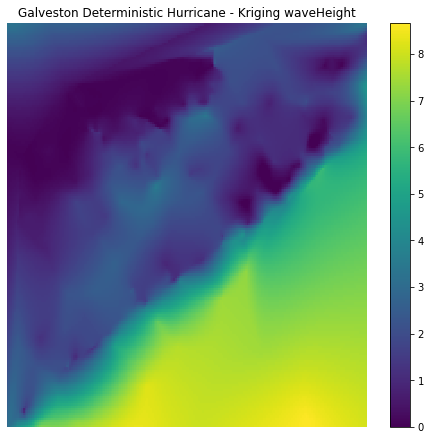

In [6]:
viz.plot_raster_dataset(galveston_deterministic_hurricane, client)

In [7]:
sh_bldg_inv = Dataset.from_data_service(shelby_hospital_inv_id, DataService(client))

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


In [8]:
sh_road = Dataset.from_data_service(shelby_road_id, DataService(client))

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


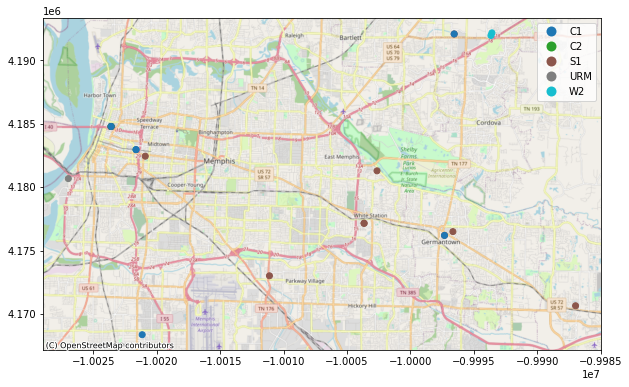

In [9]:
viz.plot_map(sh_bldg_inv, column="struct_typ", category=False, basemap=True)

In [10]:
viz.get_wms_map([sh_bldg_inv, sh_road])

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [11]:
viz.get_gdf_map([sh_bldg_inv, sh_road])

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [12]:
viz.get_gdf_wms_map([sh_bldg_inv], [sh_road])

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


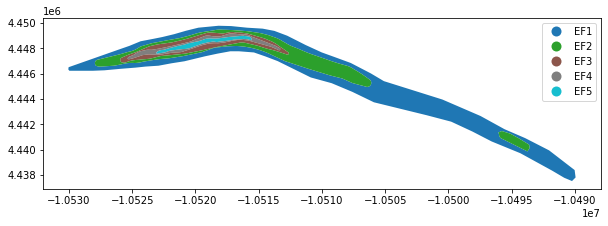

In [13]:
viz.plot_tornado(tornado_hazard_id, client, basemap=False)

In [14]:
tornado_dataset_id = HazardService(client).get_tornado_hazard_metadata(tornado_hazard_id)['datasetId']
tornado_dataset = Dataset.from_data_service(tornado_dataset_id, DataService(client))

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


In [15]:
viz.get_gdf_map([tornado_dataset])

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [16]:
joplin_bldg_inv = Dataset.from_data_service(joplin_bldg_inv_id, DataService(client))

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


In [17]:
# using wms layer for joplin building inv. gdf will crash the browser
viz.get_gdf_wms_map([tornado_dataset], [joplin_bldg_inv])

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [18]:
# visualize incore network dataset
network_dataset = NetworkDataset.from_data_service(centerville_epn_network_id, DataService(client))
viz.plot_network_dataset(network_dataset)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [19]:
# visualize multiple vector based dataset
joplin_random_angle_tornado = '5d49ddc5b9219c0689f184ca'
joplin_tornado = '5f4f0ec78e5e451825ccabbf'
joplin_power_facility_substations = '5d92355bb9219c06ae7e386a'
tornado1_metadata = HazardService(client).get_tornado_hazard_metadata(joplin_random_angle_tornado)
tornado2_metadata = HazardService(client).get_tornado_hazard_metadata(joplin_tornado)
dataset1 = Dataset.from_data_service(tornado1_metadata["datasetId"], DataService(client))
dataset2 = Dataset.from_data_service(tornado2_metadata["datasetId"], DataService(client))
dataset3 = Dataset.from_data_service(joplin_power_facility_substations, DataService(client))
viz.plot_multiple_vector_dataset([dataset1, dataset2, dataset3])

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[37.11509190211582, -94.28045867775216], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


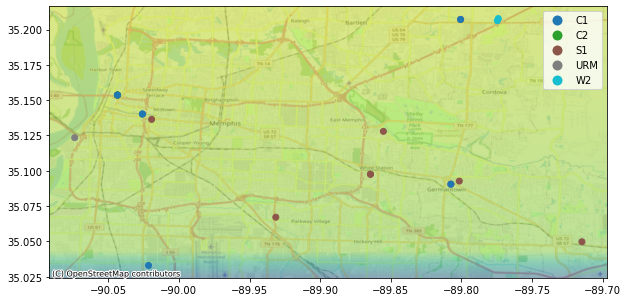

In [20]:
# visualize gdf map overlayed with raster based hazard
shelby_hospital_inv_id = "5a284f0bc7d30d13bc081a28"
memphis_eq= "5b902cb273c3371e1236b36b"

eq_dataset_id = HazardService(client).get_earthquake_hazard_metadata(memphis_eq)['rasterDataset']['datasetId']
raster = Dataset.from_data_service(eq_dataset_id, DataService(client))

dataset = Dataset.from_data_service(shelby_hospital_inv_id, DataService(client))
gdf = gpd.read_file(dataset.local_file_path)

map = viz.overlay_gdf_with_raster_hazard(gdf, "struct_typ", raster)

In [21]:
# visualize geotiff
dataset = Dataset.from_data_service(galvaston_wave_height_id, DataService(client))
map = viz.map_raster_overlay_from_file(dataset.get_file_path('tif'))
map

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [22]:
# add opacity control
map.layers[1].interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description='opacity', max=1.0, step=0.01),))

In [23]:
# choropleth map using multiple fields from single dataset
social_vulnerability_census_block_group = '5a284f57c7d30d13bc08254c'
dataset = Dataset.from_data_service(social_vulnerability_census_block_group, DataService(client))
viz.plot_choropleth_multiple_fields_from_single_dataset(dataset, ['tot_hh', 'totpop'])

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
create choropleth data for tot_hh
create choropleth data for totpop


Map(center=[35.11790375987998, -89.94989264899714], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [24]:
# choropleth map using multiple datasets
social_vulnerability_census_block_group = '5a284f57c7d30d13bc08254c'
dislocation_census_block_group = '5a284f58c7d30d13bc082566'
dataset1 = Dataset.from_data_service(social_vulnerability_census_block_group, DataService(client))
dataset2 = Dataset.from_data_service(dislocation_census_block_group, DataService(client))
viz.plot_choropleth_multiple_dataset([dataset1, dataset2], ['tot_hh', 'p_16pyr'])

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
create choropleth data for tot_hh
create choropleth data for p_16pyr


Map(center=[35.12511150773092, -89.94094978653294], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [25]:
# visualize point heatmap
dataset = Dataset.from_data_service(shelby_hospital_inv_id, DataService(client))
map = viz.plot_heatmap(dataset, "str_prob", radius=40, blur=50, max=0.1, multiplier=100)
map

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [26]:
# visualize line heatmap
dataset = Dataset.from_data_service(memphis_water_buried_pipeline, DataService(client))
map = viz.plot_heatmap(dataset, "length", radius=30, blur=50, max=0.5, multiplier=100)
map

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [27]:
# visualize polygon heatmap
dataset = Dataset.from_data_service(shelby_census_tract, DataService(client))
map = viz.plot_heatmap(dataset, "id", radius=30, blur=50, max=0.1)
map

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

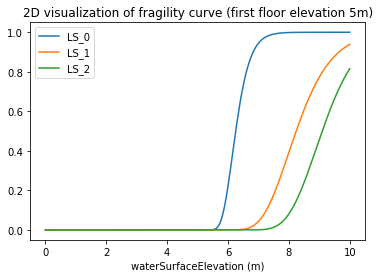

In [28]:
# configure custom fragility curve parameters
custom_fragility_curve_parameters={"ffe_elev": 5}
fragility_set = FragilityCurveSet(FragilityService(client).get_dfr3_set("602f31f381bd2c09ad8efcb4"))
plt = plot.get_fragility_plot_2d(fragility_set, 
                                            title="2D visualization of fragility curve (first floor elevation 5m)", 
                                            custom_curve_parameters=custom_fragility_curve_parameters)
plt.show()

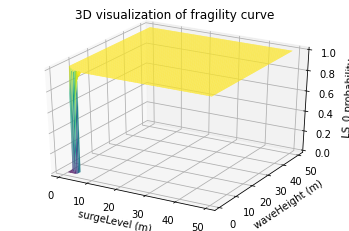

In [29]:
# visualize format 3d
fragility_set = FragilityCurveSet(FragilityService(client).get_dfr3_set("5f6ccf67de7b566bb71b202d"))
plt = plot.get_fragility_plot_3d(fragility_set, title="3D visualization of fragility curve",
                                            limit_state="LS_0")
plt.show()